# HW3 - Image Clustering

## Installs and downloads:

In [ ]:
! wget https://raw.githubusercontent.com/inder123/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

from google.colab import drive
drive.mount('/content/drive')

! pip install face_recognition
import face_recognition

--2023-06-17 11:13:02--  https://raw.githubusercontent.com/inder123/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1254733 (1.2M) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>]   1.20M  --.-KB/s    in 0.03s   

2023-06-17 11:13:02 (35.5 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [1254733/1254733]

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3

## Preprocess:

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import shutil
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import time
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
path_to_original_images_dir = '/content/drive/MyDrive/hw4-image clustering/original_images'
path_to_only_faces_images = '/content/drive/MyDrive/hw4-image clustering/only_faces_images'

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def image_to_faces():
  # Loop through all files in the directory
  counter = 0
  for filename in os.listdir(path_to_original_images_dir):
        # Read the image
        image_path = os.path.join(path_to_original_images_dir, filename)
        image = cv2.imread(image_path)
        # Convert into grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Detect faces
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        for (x, y, w, h) in faces:
            # Crop the image to the detected face
            face_image = image[y:y+h, x:x+w]
            # Save the face image to the specified path
            cv2.imwrite(f"{path_to_only_faces_images}/face_{counter}.jpg",face_image)
            counter += 1
            print(f"Face saved: {path_to_only_faces_images}")

def clean_faces():
  lst = []
  for filename in os.listdir(path_to_only_faces_images):
    image_path = os.path.join(path_to_only_faces_images, filename)
    image = cv2.imread(image_path)
    encodings = face_recognition.face_encodings(image)
    if len(encodings) == 0:
      os.remove(image_path)
    else:
      lst.append(encodings[0])
  df = pd.DataFrame(lst)
  return df


def get_number_of_images(path):
  return len(os.listdir(path))

def show_image_with_rectangles():
  # Loop through all files in the directory
  for filename in os.listdir(path_to_original_images_dir):
    # Read the image
    image_path = os.path.join(path_to_original_images_dir, filename)
    image = cv2.imread(image_path)
    # Convert into grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw rectangle around the faces
    for (x, y, w, h) in faces:
      cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # Display the output
    cv2_imshow(image)
    cv2.waitKey()
    break



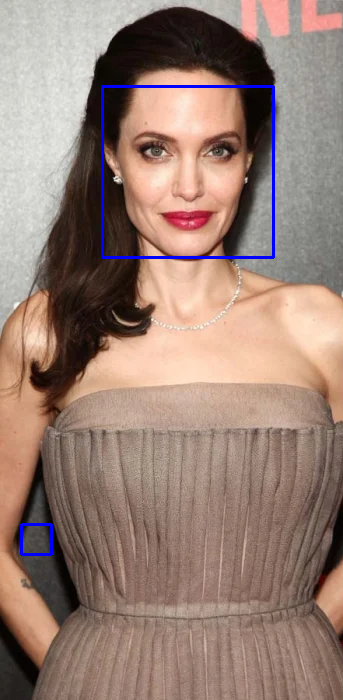

In [ ]:
show_image_with_rectangles()

In [ ]:
print(f"the number of images in the original dataset: {get_number_of_images(path_to_original_images_dir)}")

the number of images in the original dataset: 200


In [ ]:
image_to_faces()

In [ ]:
print(f"the number of faces before using face_recognition: {get_number_of_images(path_to_only_faces_images)}")

the number of faces before using face_recognition: 425


In [ ]:
df_features = clean_faces()

In [ ]:
print(f"the number of faces after using face_recognition: {get_number_of_images(path_to_only_faces_images)}") # after using face_recognition

the number of faces after using face_recognition: 267


In [ ]:
# change the files names
directory = '/content/drive/MyDrive/hw4-image clustering/only_faces_images'
file_list = os.listdir(directory)

# Iterate over the files and rename them
for i, filename in enumerate(file_list):
    # Generate the new filename with the sequential order
    new_filename = f"face_{i}.jpg"

    # Construct the paths for the old and new filenames
    old_filepath = os.path.join(directory, filename)
    new_filepath = os.path.join(directory, new_filename)

    # Rename the file
    os.rename(old_filepath, new_filepath)

In [ ]:
# df.to_pickle("/content/drive/MyDrive/hw4-image clustering/df.pkl")
df_features.to_csv('/content/drive/MyDrive/hw4-image clustering/df_features.csv', index=False)



In [ ]:
# df = pd.read_pickle("/content/drive/MyDrive/hw4-image clustering/df.pkl")
df_features = pd.read_csv('/content/drive/MyDrive/hw4-image clustering/df_features.csv')

## Find best K:

In [ ]:
# implement here
inertia = []
silhouette = []
for i in range(10,70):
  kmeans = KMeans(n_clusters = i, random_state=42)
  kmeans.fit(df_features)
  inertia.append(kmeans.inertia_)
  silhouette.append(silhouette_score(df_features, kmeans.labels_, metric='euclidean'))


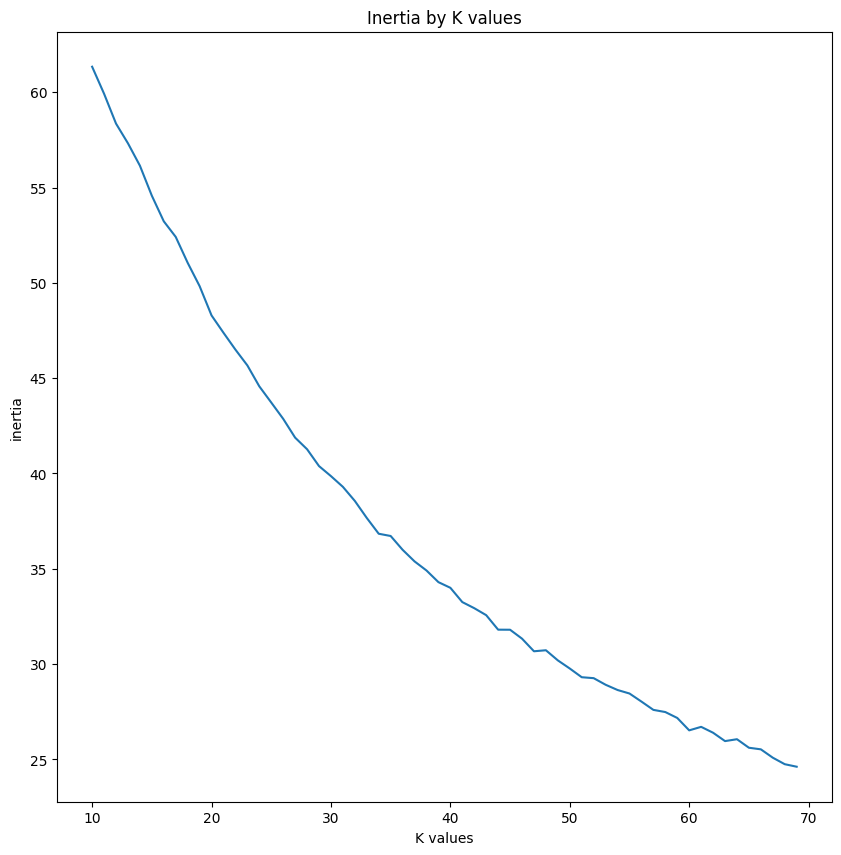

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(10,70), inertia)
plt.xlabel('K values')
plt.ylabel('inertia')
plt.title('Inertia by K values')
plt.show()

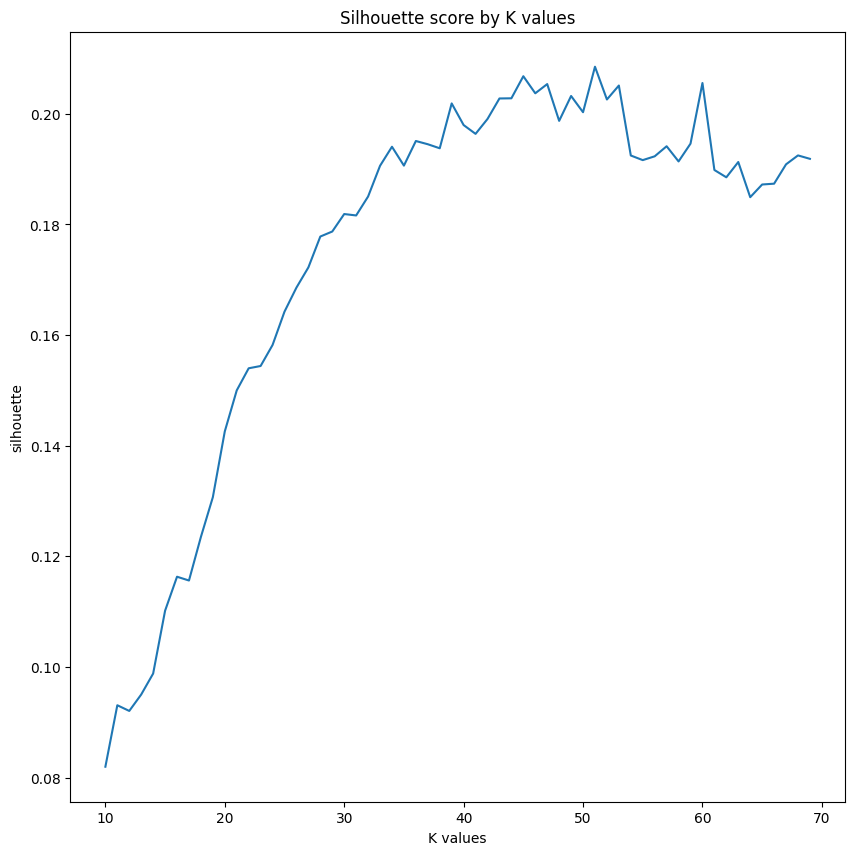

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(10,70), silhouette)
plt.xlabel('K values')
plt.ylabel('silhouette')
plt.title('Silhouette score by K values')
plt.show()

In [ ]:
max_silhouette = max(silhouette)
best_k = range(10, 70)[silhouette.index(max_silhouette)]

print("Best k value:", best_k)

Best k value: 51


## KMeans with the selected K:

In [ ]:
# implement here

# Define the number of clusters (K)
selected_k = best_k

# Create the KMeans model
kmeans = KMeans(n_clusters=selected_k)
kmeans.fit(df_features)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Create a folder for each cluster
cluster_folder_path = '/content/drive/MyDrive/hw4-image clustering/kmeans_clusters1'
os.makedirs(cluster_folder_path, exist_ok=True)

# Iterate over each data point and save the image to the appropriate cluster folder
for i, label in enumerate(labels):
    image_filename = f"face_{i}.jpg"
    source_image_path = os.path.join(path_to_only_faces_images, image_filename)
    target_folder_path = os.path.join(cluster_folder_path, f"cluster_{label}")
    os.makedirs(target_folder_path, exist_ok=True)
    target_image_path = os.path.join(target_folder_path, image_filename)
    shutil.copy(source_image_path, target_image_path)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# TSNE

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import pairwise_distances

def find_medoid(cluster):
    distances = pairwise_distances(cluster, metric='euclidean')
    total_distances = np.sum(distances, axis=1)
    medoid_index = np.argmin(total_distances)
    medoid = cluster[medoid_index]
    return medoid



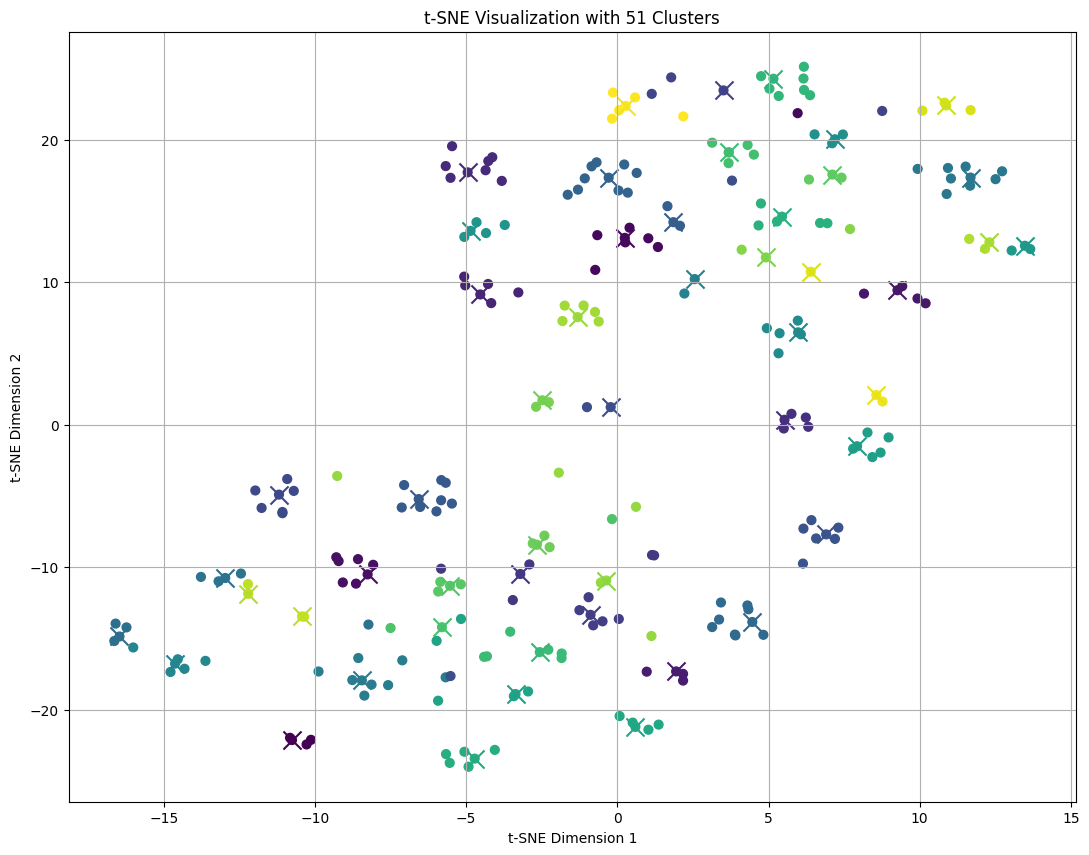

In [ ]:
# Perform t-SNE dimension reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(df_features)

# Get the cluster centers (medoids)
cluster_centers = kmeans.cluster_centers_

# Get the cluster labels for each data point
labels = kmeans.labels_

plt.figure(figsize=(13, 10))

# Plot the t-SNE visualization
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis', s=40, alpha=1)

# draw x on the center:
for i, center in enumerate(cluster_centers):
  cluster_points = tsne_data[labels == i]
  cluster_color = plt.cm.get_cmap('viridis')(i / len(cluster_centers))  # Color of the cluster
  center = find_medoid(cluster_points)
  plt.scatter(center[0], center[1], marker='x', color=cluster_color, s=170)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title(f"t-SNE Visualization with {selected_k} Clusters")
plt.grid(True)

plt.show()


## KMeans with the selected K after TSNE:


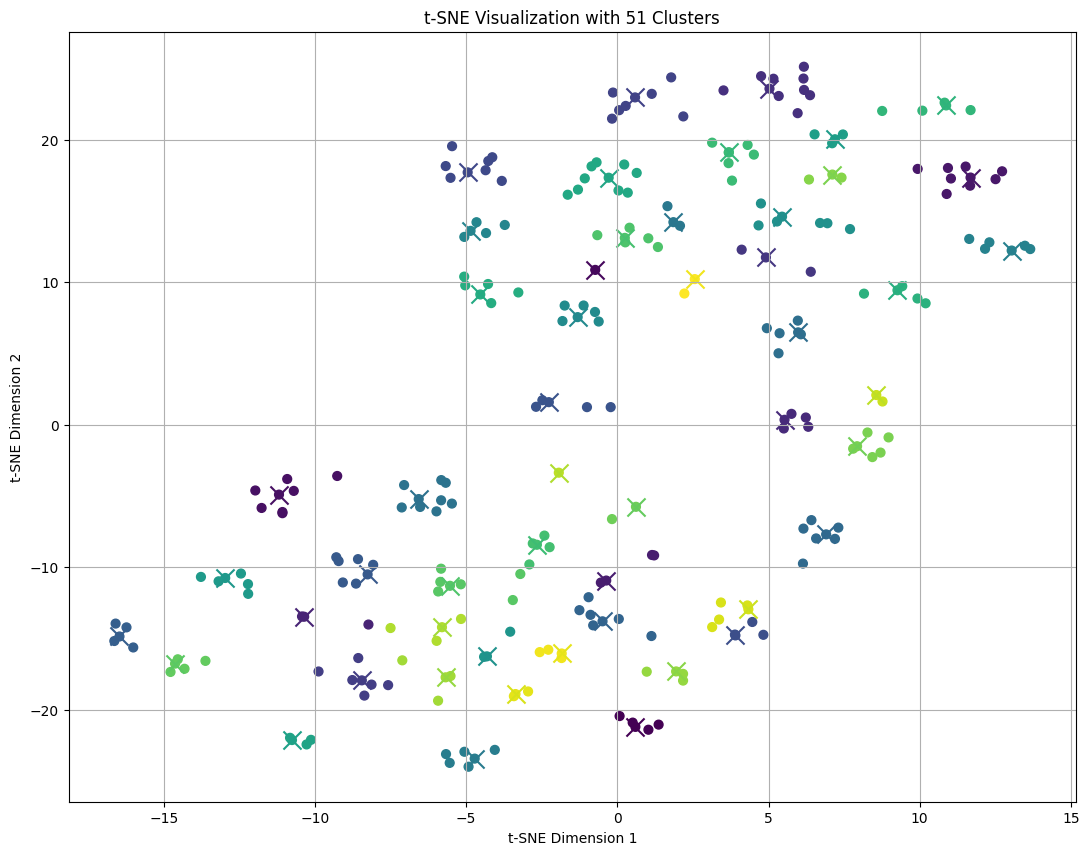

In [ ]:
# Create the KMeans model
kmeans = KMeans(n_clusters=selected_k)
kmeans.fit(tsne_data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers (medoids)
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(13, 10))

# Plot the t-SNE visualization
scatter = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis', s=40, alpha=1)

# draw the x:
for i, center in enumerate(cluster_centers):
  cluster_points = tsne_data[labels == i]
  cluster_color = plt.cm.get_cmap('viridis')(i / len(cluster_centers))  # Color of the cluster
  center = find_medoid(cluster_points)
  plt.scatter(center[0], center[1], marker='x', color=cluster_color, s=170)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title(f"t-SNE Visualization with {selected_k} Clusters")
plt.grid(True)

plt.show()



## DBSCAN after TSNE:


In [ ]:
# find the best values for epsilon and min_samples

# Define the range of parameter values to search
epsilon_range = np.arange(0.1, 3, 0.02)
min_samples_range = range(2, 10)

results = []

# Perform the grid search
for epsilon in epsilon_range:
    for sample in min_samples_range:
        # Perform DBSCAN clustering
        dbscan = DBSCAN(eps=epsilon, min_samples=sample)
        dbscan.fit(tsne_data)

        # Evaluate the clustering performance
        labels = dbscan.labels_

        if len(np.unique(labels)) < 2:
            silhouette_avg = -1  # Assign a default value if only one unique label
        else:
            silhouette_avg = silhouette_score(tsne_data, labels)

        noise_points = sum(labels == -1)

        # Store the results in a DataFrame
        results.append({'eps': epsilon, 'min_samples': sample, 'noise': noise_points, 'silhouette_score': silhouette_avg})

# Create a DataFrame from the results
df_results = pd.DataFrame(results)

# Sort the DataFrame by silhouette score in descending order
df_results = df_results.sort_values('silhouette_score', ascending=False)

df_results



,eps,min_samples,noise,silhouette_score
592,1.58,2,10,0.609706
584,1.56,2,10,0.609706
576,1.54,2,10,0.609378
568,1.52,2,11,0.605726
560,1.50,2,11,0.605726
...,...,...,...,...
221,0.64,7,267,-1.000000
222,0.64,8,267,-1.000000
223,0.64,9,267,-1.000000
455,1.22,9,267,-1.000000


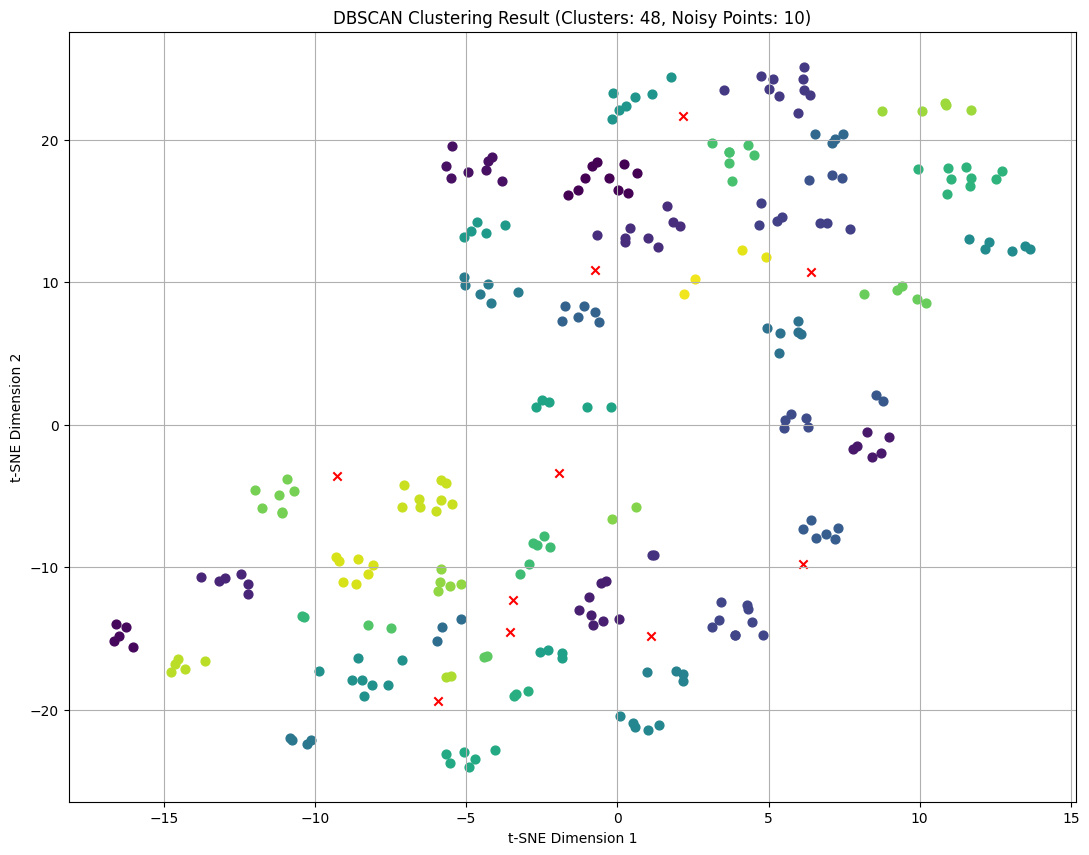

In [ ]:
# Get the epsilon and min_samples values from the first row of df_results
epsilon = df_results['eps'].iloc[0]
min_samples = df_results['min_samples'].iloc[0]

# Perform DBSCAN clustering with the selected parameters
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(tsne_data)
labels = dbscan.labels_

# Get the number of clusters and number of noisy points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noisy_points = np.sum(labels == -1)

# Plot the DBSCAN clustering result
plt.figure(figsize=(13, 10))
cmap = plt.cm.get_cmap('viridis', len(np.unique(labels)))

# Plot the clustered points
for label in np.unique(labels):
    if label != -1:
        plt.scatter(tsne_data[labels == label, 0], tsne_data[labels == label, 1], c=[cmap(label)], s=40, alpha=1, label=f'Cluster {label}')
    else:
        plt.scatter(tsne_data[labels == label, 0], tsne_data[labels == label, 1], c='red', marker='x', label='Noise')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title(f'DBSCAN Clustering Result (Clusters: {n_clusters}, Noisy Points: {n_noisy_points})')
plt.grid(True)
plt.show()


# save in drive





In [ ]:
# Get the cluster labels for each data point
labels = dbscan.labels_

# Create a folder for each cluster
cluster_folder_path = "/content/drive/MyDrive/hw4-image clustering/dbscan_clusters1"
os.makedirs(cluster_folder_path, exist_ok=True)

# Iterate over each data point and save the image to the appropriate cluster folder
for i, label in enumerate(labels):
    image_filename = f"face_{i}.jpg"
    source_image_path = os.path.join(path_to_only_faces_images, image_filename)
    target_folder_path = os.path.join(cluster_folder_path, f"cluster_{label}") # notice that the cluster -1 represent the noisy images
    os.makedirs(target_folder_path, exist_ok=True)
    target_image_path = os.path.join(target_folder_path, image_filename)
    shutil.copy(source_image_path, target_image_path)

## Evaluation:

In [ ]:
# implement here

# Kmeans on original data (section c)
start_time = time.time()
kmeans = KMeans(n_clusters=selected_k, random_state=42)
kmeans.fit(df_features)
elapsed_time_kmeans = time.time() - start_time

labels = kmeans.labels_
silhouette_kmeans = silhouette_score(df_features, labels)
davies_bouldin_kmeans = davies_bouldin_score(df_features, labels)
calinski_harabasz_kmeans = calinski_harabasz_score(df_features, labels)

# Kmeans after TSNE
start_time = time.time()
kmeans_TSNE = KMeans(n_clusters=selected_k, random_state=42)
kmeans_TSNE.fit(tsne_data)
elapsed_time_TSNE = time.time() - start_time

labels_kmeans_TSNE = kmeans_TSNE.labels_
silhouette__kmeans_TSNE = silhouette_score(tsne_data, labels_kmeans_TSNE)
davies_bouldin_kmeans_TSNE = davies_bouldin_score(tsne_data, labels_kmeans_TSNE)
calinski_harabasz_kmeans_TSNE = calinski_harabasz_score(tsne_data, labels_kmeans_TSNE)

# DBscan
start_time = time.time()
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(tsne_data)
elapsed_time_dbscan = time.time() - start_time

labels_dbscan = dbscan.labels_
silhouette_dbscan = silhouette_score(tsne_data, labels_dbscan)
davies_bouldin_dbscan = davies_bouldin_score(tsne_data, labels_dbscan)
calinski_harabasz_dbscan = calinski_harabasz_score(tsne_data, labels_dbscan)

evaluation_df = pd.DataFrame({
    'Model': ['Kmeans', 'KMeans TSNE', 'DBSCAN'],
    'Silhouette Score': [silhouette_kmeans, silhouette__kmeans_TSNE, silhouette_dbscan],
    'Davies-Bouldin Score': [davies_bouldin_kmeans, davies_bouldin_kmeans_TSNE, davies_bouldin_dbscan],
    'Calinski-Harabasz Score': [calinski_harabasz_kmeans, calinski_harabasz_kmeans_TSNE, calinski_harabasz_dbscan],
    'Elapsed Time (s)': [elapsed_time_kmeans, elapsed_time_TSNE, elapsed_time_dbscan],
})


# Sort the results by the score in descending order
evaluation_df.sort_values('Silhouette Score', ascending=False, inplace=True)

evaluation_df


,Model,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score,Elapsed Time (s)
2,DBSCAN,0.609706,1.151420,152.717684,0.002132
1,KMeans TSNE,0.603002,0.494597,1394.980764,0.174667
0,Kmeans,0.208507,1.505358,9.232557,0.507820


In [ ]:
%%shell
jupyter nbconvert --to html Assignment4_image_clustering_final.ipynb

[NbConvertApp] Converting notebook Assignment4_image_clustering_final.ipynb to html
[NbConvertApp] Writing 1548208 bytes to Assignment4_image_clustering_final.html
